In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))
lc = lc.remove_outliers(4)
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

In [4]:
star = pb.star(kic, pg, 
               numax, dnu, teff, bp_rp, 
               store_chains=True, 
               nthreads=4, make_plots=True)

/home/davies/Code/PBjam/pbjam/star.py:76: UserWarning: Path /home/davies/Code/PBjam/Examples/4448777 already exists
  warnings.warn(f'Path {self.bpath} already exists')


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [06:15<00:00,  4.63draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 5min 15s, sys: 2.64 s, total: 5min 18s
Wall time: 11min 30s


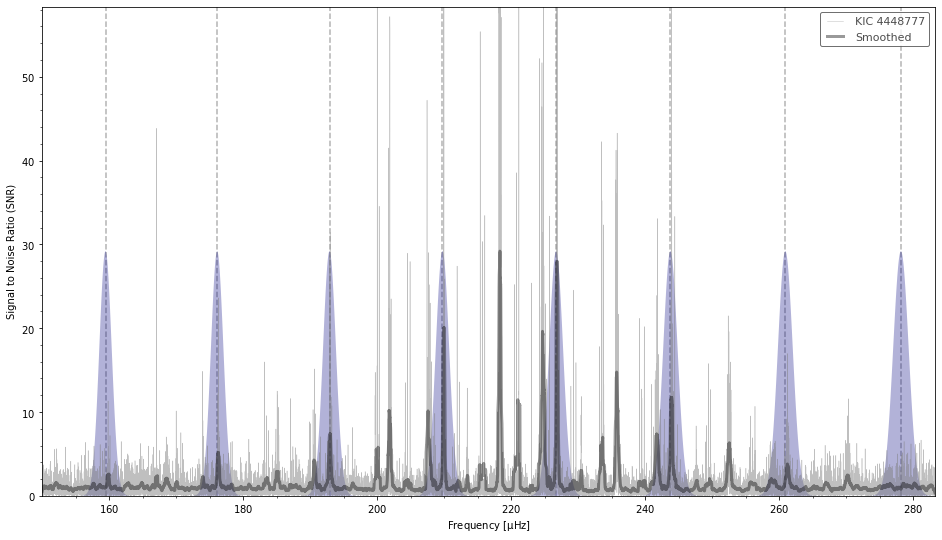

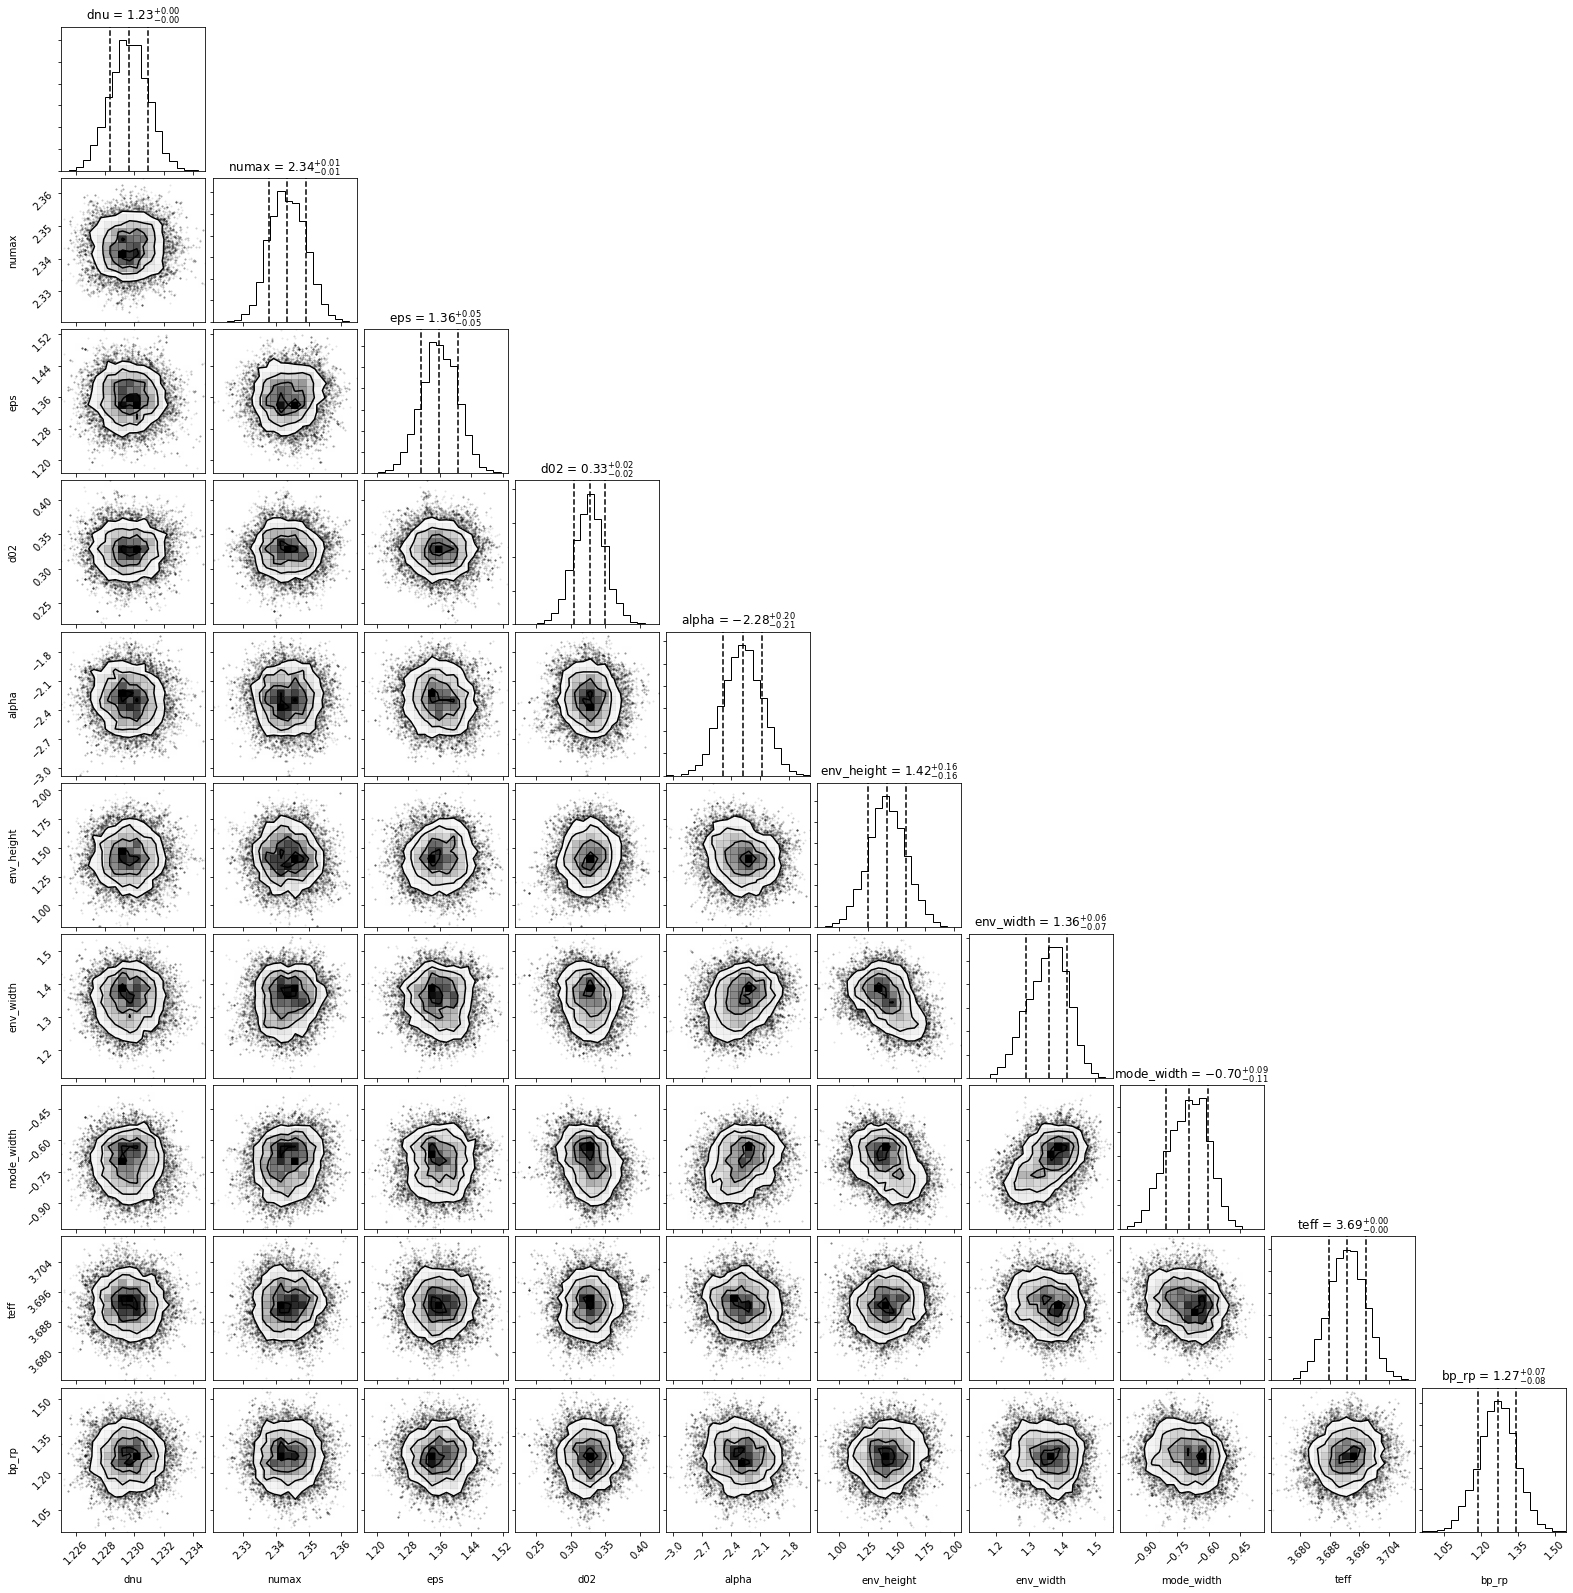

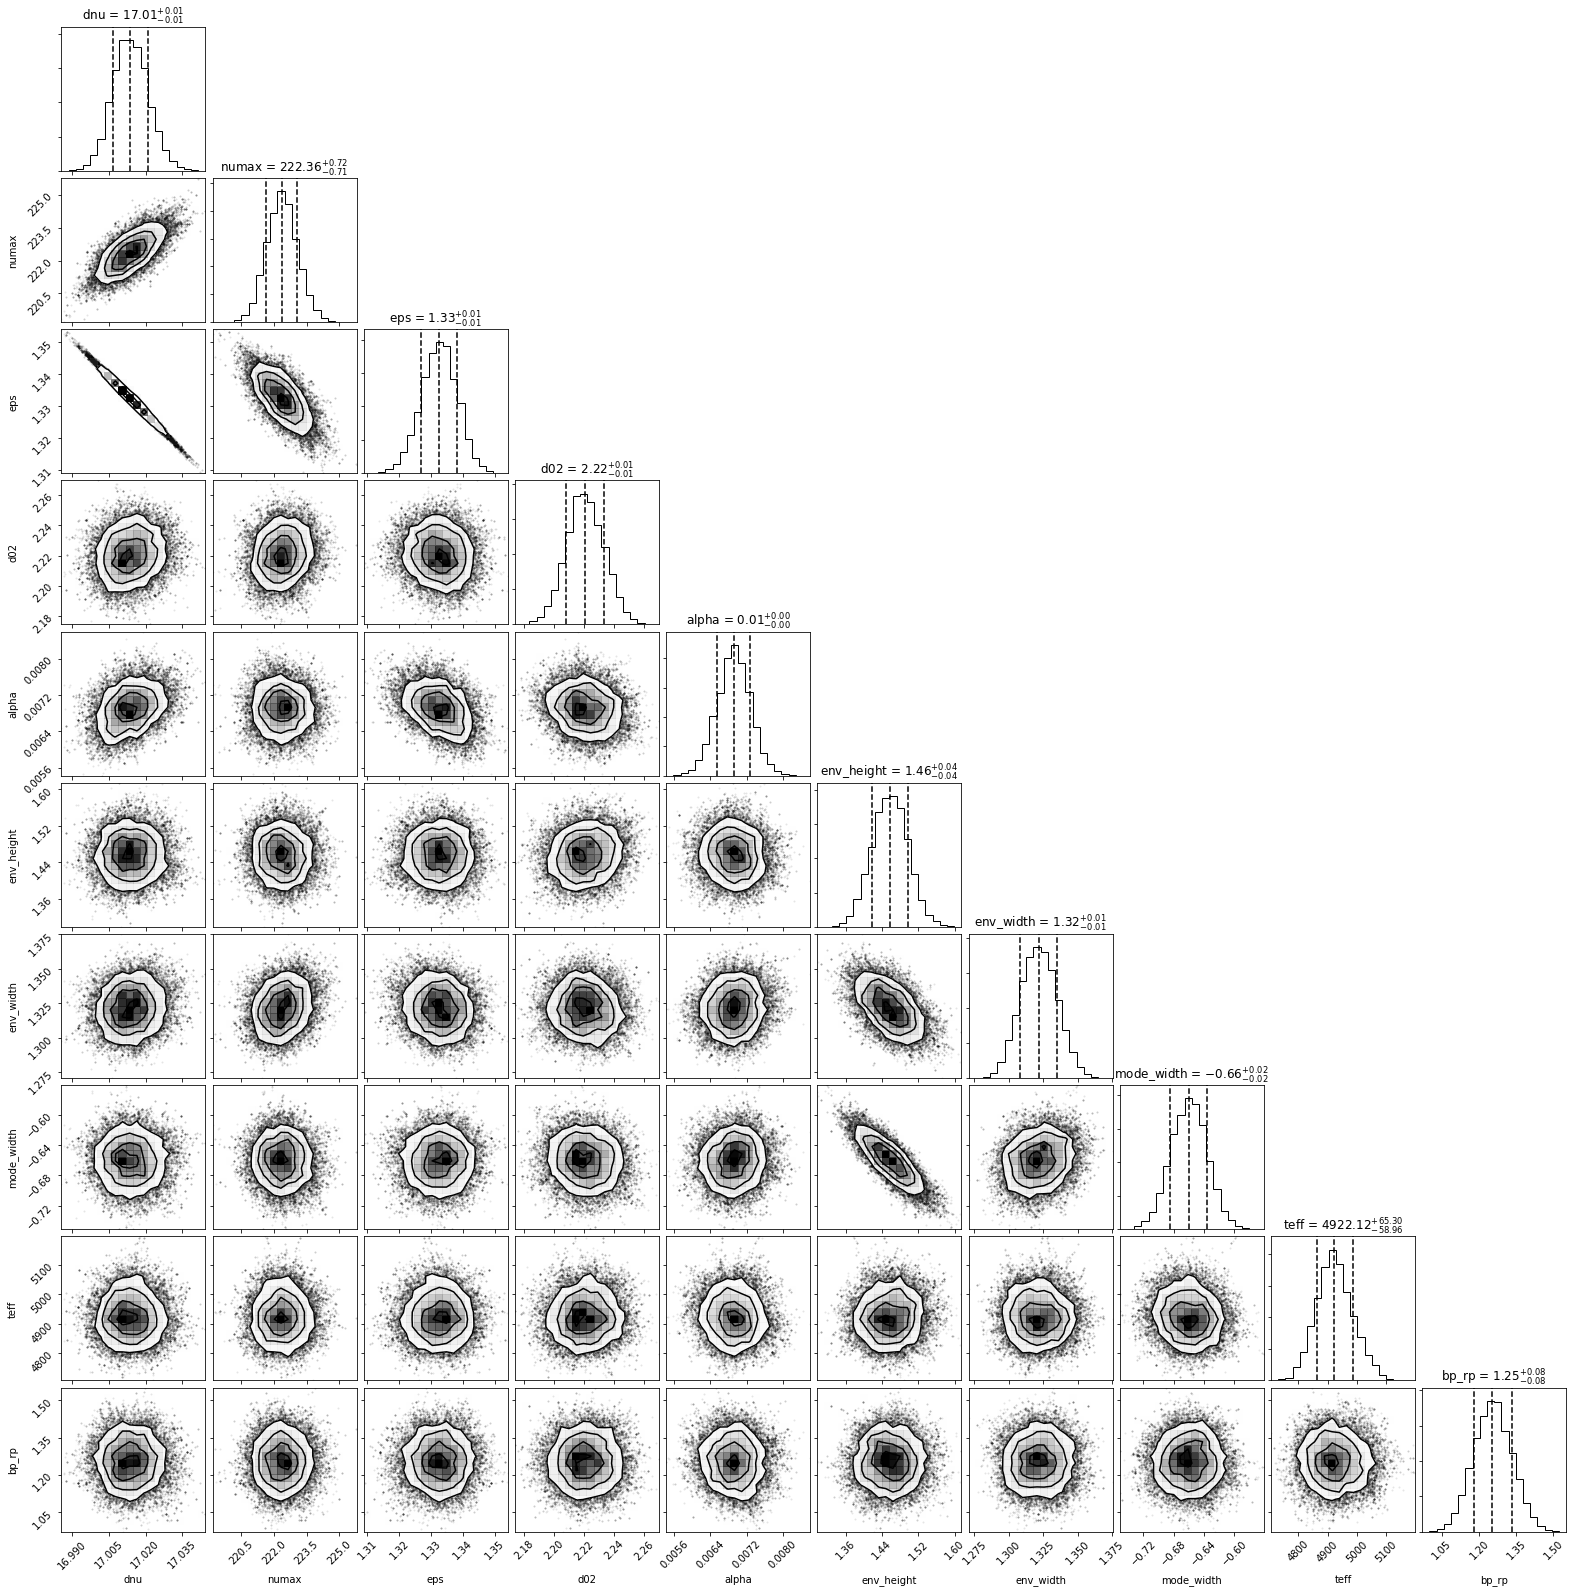

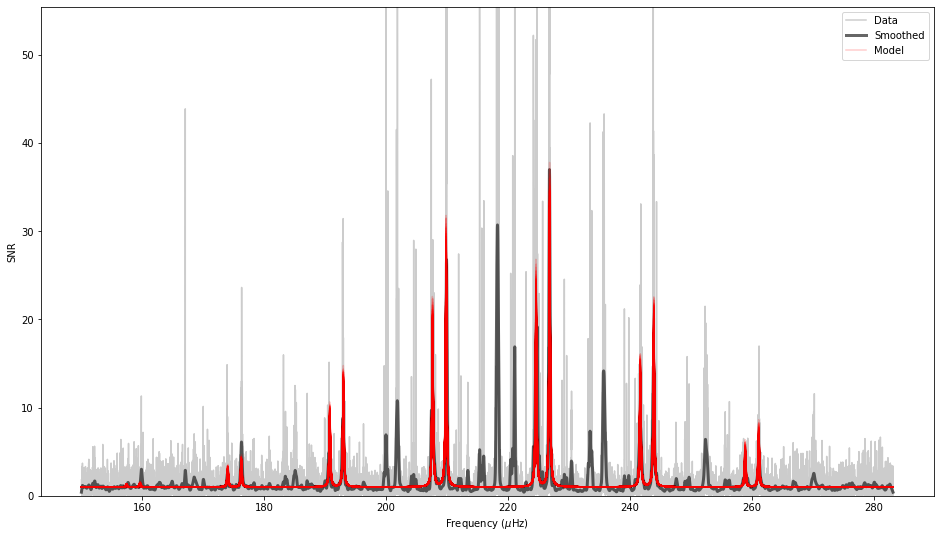

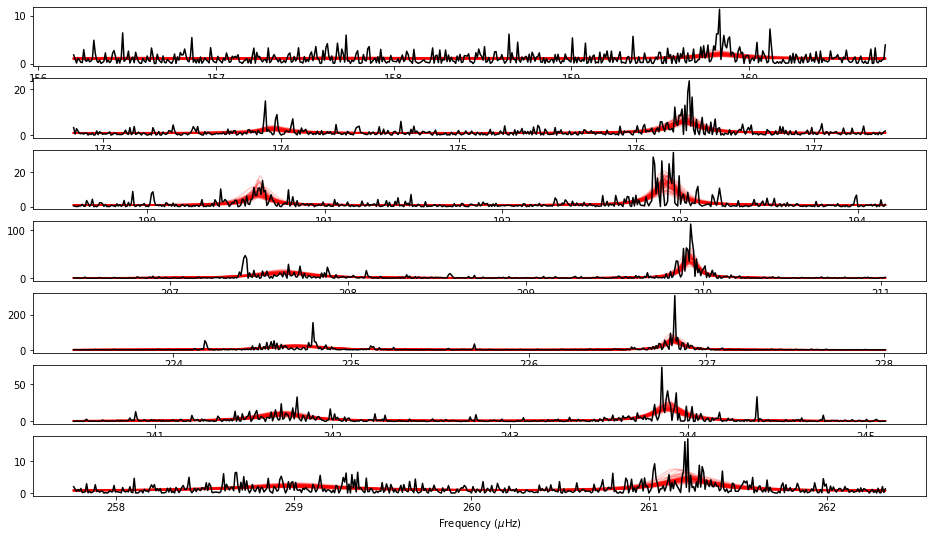

In [5]:
%%time
star()